<a href="https://colab.research.google.com/github/Alexa201228/ml_course_works/blob/main/Regression_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Домашнее задание по теме "Основы задач регрессии"

Поработаем с [данными](https://raw.githubusercontent.com/obulygin/content/main/ecommers_customers/ecommerce.csv) (анонимизированными) компании, которая предлагает услуги стилистов.

Значимые столбцы:

* Avg. Session Length: среднее время консультации стилистом клиента оффлайн
* Time on App: среднее время клиента в приложении
* Time on Website: средняя время клиента на сайте
* Length of Membership: сколько лет клиент пользуется услугами компании.
* Yearly Amount Spent (целевая переменная): траты клиента на услуги компании за год.


Вам необходимо:  
1) Прочитать данные.  
2) Проверить, есть ли в них проблемы, которые помешают дальнейшей работе (пропуски, аномалии, некорректные типы данных).  
3) Изучить взаимосвязь признаков с целевой переменной.  
4) На основе взаимосвязей выбрать и построить модель, прогнозирующую годовую сумму трат клиента.  
5) Оценить модель. Построить точечный график прогнозных значений относительно фактических и оценить метрику качества (выберите её самостоятельно).   
6) Написать выводы на основе интерпретации результатов модели: что сильнее влияет на доход компании? Сформировать краткие рекомендации.

*Сопровождайте все действия, которые могут предполагать альтернативные способы реализации, обоснованием*.

In [ ]:
# Загрузка данных
!wget https://raw.githubusercontent.com/obulygin/content/main/ecommers_customers/ecommerce.csv

--2023-08-06 09:36:04--  https://raw.githubusercontent.com/obulygin/content/main/ecommers_customers/ecommerce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘ecommerce.csv.3’

ecommerce.csv.3     100%[===================>]  85.31K  --.-KB/s    in 0.005s  

2023-08-06 09:36:04 (16.6 MB/s) - ‘ecommerce.csv.3’ saved [87360/87360]



In [ ]:
import sys

!"{sys.executable}" -m pip install phik

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

## Чтение и анализ данных

In [ ]:
ecommerce_data = pd.read_csv('./ecommerce.csv')
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
# Данные типа object (Email, Address и Avatar) не влияют на целевую переменную, их можно убрать
ecommerce_data = ecommerce_data.drop(['Email', 'Address','Avatar'], axis=1)

<Axes: >

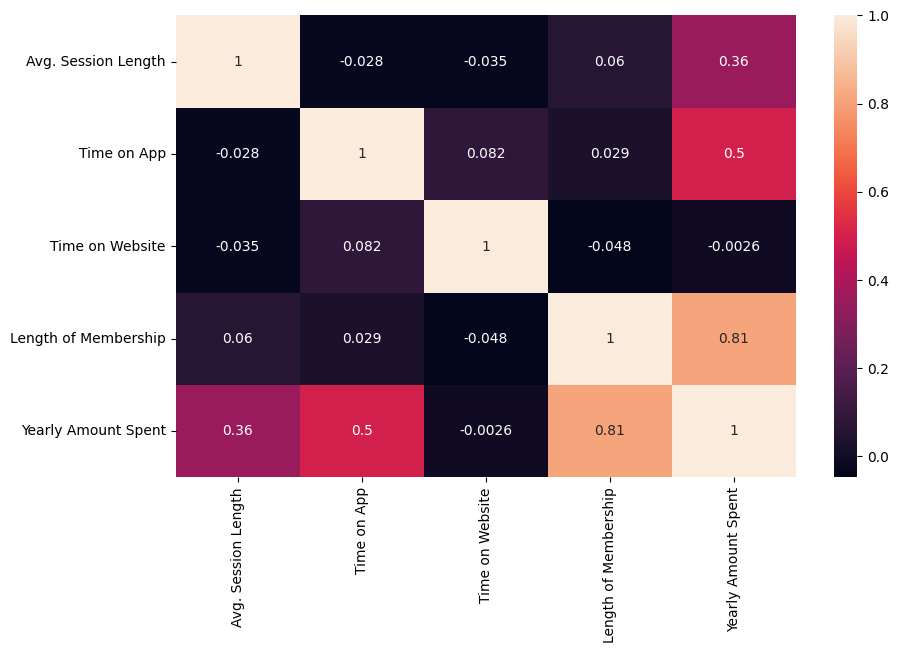

In [ ]:
# Визуализация корреляции Пирсона

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(ecommerce_data.corr(), ax=ax, annot=True)

<Axes: >

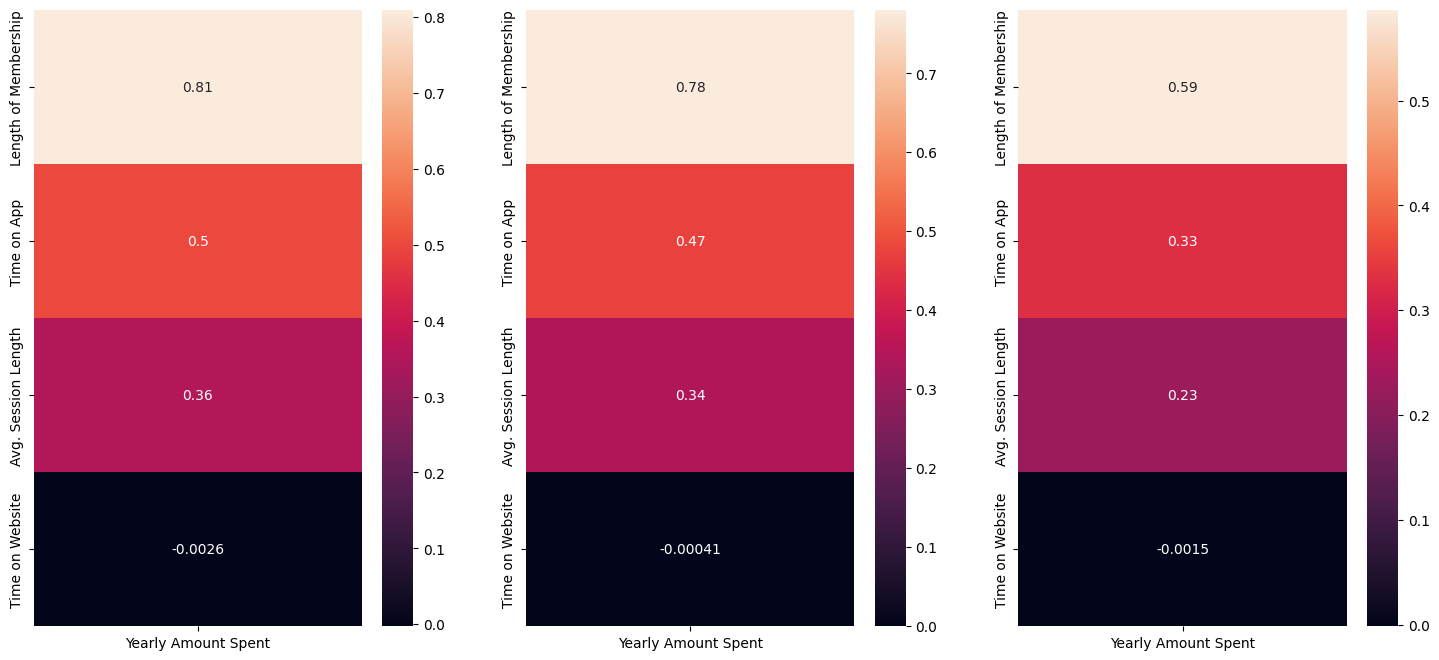

In [ ]:
# Построим корреляции Пирсона, Спирмена и Кендалла

fig, ax = plt.subplots(1,3, figsize=(18, 8))

corr1 = ecommerce_data.corr('pearson')[['Yearly Amount Spent']].sort_values(by='Yearly Amount Spent', ascending=False).drop('Yearly Amount Spent')
corr2 = ecommerce_data.corr('spearman')[['Yearly Amount Spent']].sort_values(by='Yearly Amount Spent', ascending=False).drop('Yearly Amount Spent')
corr3 = ecommerce_data.corr('kendall')[['Yearly Amount Spent']].sort_values(by='Yearly Amount Spent', ascending=False).drop('Yearly Amount Spent')


sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

interval columns not set, guessing: ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


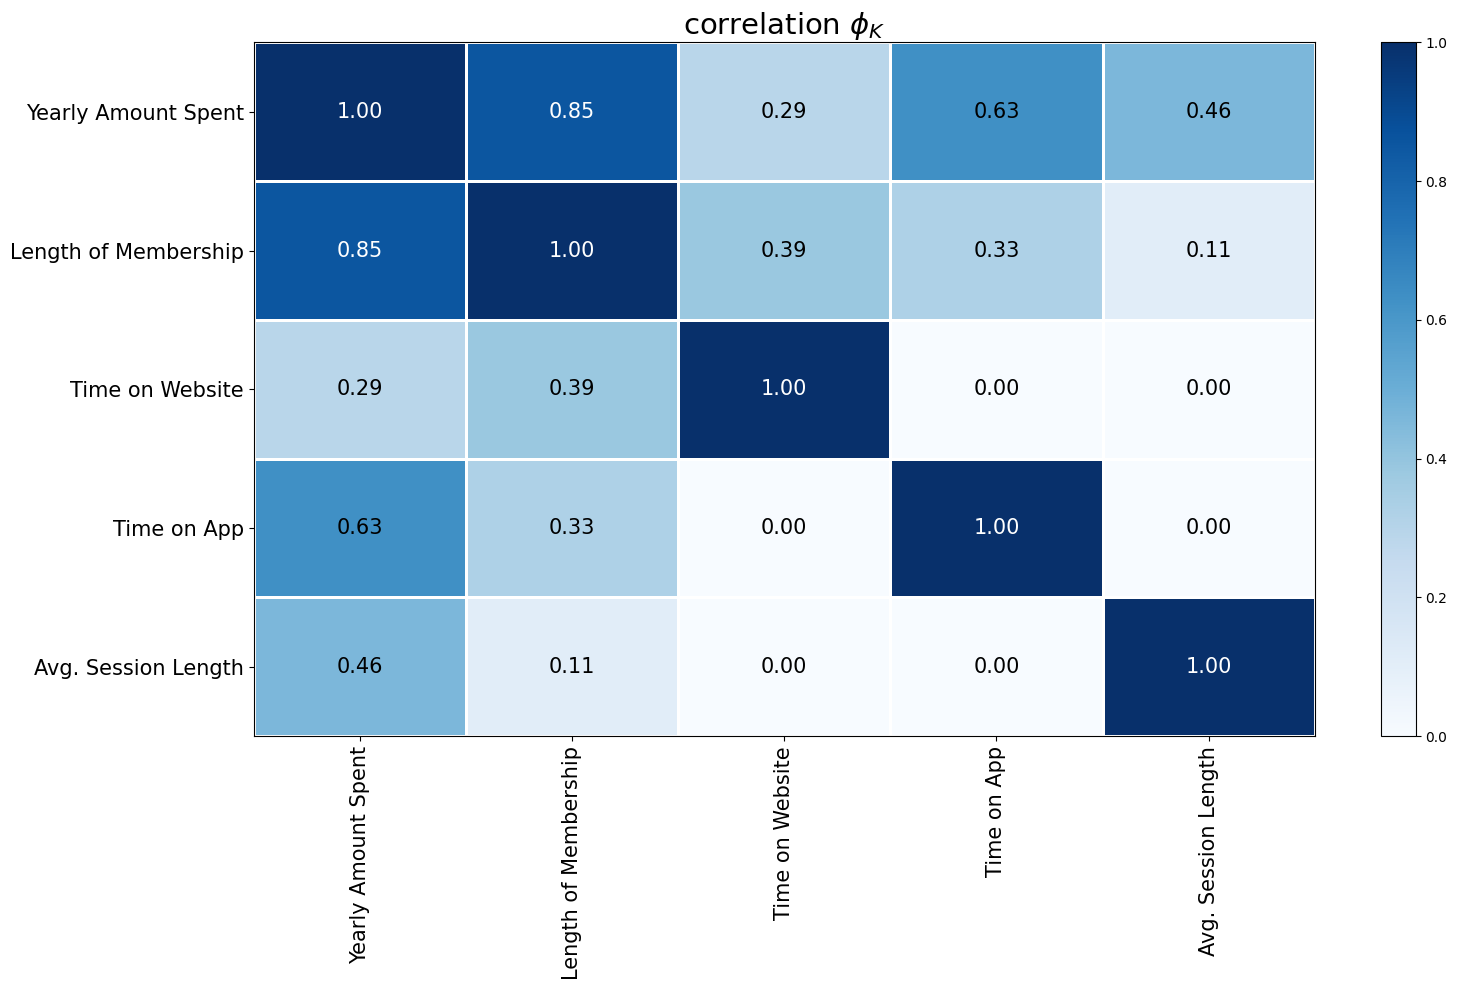

In [ ]:
# (Опционально) Посчитаем фик коэффициент (справляется с недостатками вышеперечисленных методов)

phik_overview = ecommerce_data.phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(16,10))
plt.tight_layout()

После расчета корреляции можно заметить, что наибольшую корреляцию целевая переменная имеет с переменной Length of Membership. На основании этих данных построим baseline.

In [ ]:
# Базовая модель будет иметь вид линейной регрессии с одним признаком Length of Membership

X = ecommerce_data[['Length of Membership']]
y = ecommerce_data['Yearly Amount Spent']

In [ ]:
# Перед обучением модели необходимо разбить данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Test shape: {X_test.shape}')
print(f'Train shape: {X_train.shape}')

Test shape: (100, 1)
Train shape: (400, 1)


In [ ]:
# Создаем базовую линейную модель и делаем прогноз

from sklearn.linear_model import LinearRegression

base_model = LinearRegression()

base_model.fit(X_train, y_train)

y_predicted = base_model.predict(X_test)


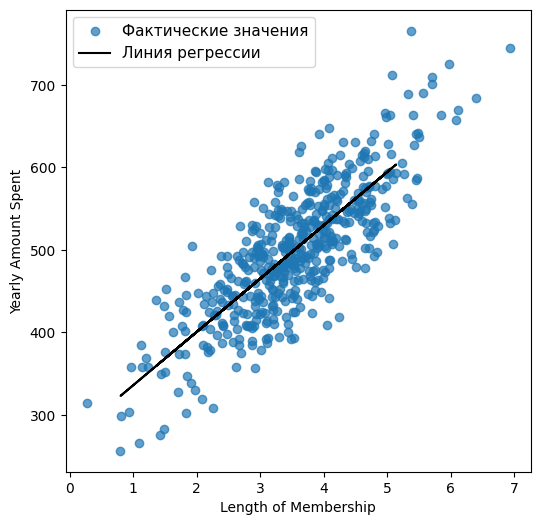

In [ ]:
# Визуализация прогноза

plt.figure(figsize=(6, 6))
plt.scatter(X, y, alpha=0.7, label='Фактические значения')
plt.plot(X_test, y_predicted, color='black', label='Линия регрессии')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.legend(facecolor='white', fontsize=11)

In [ ]:
# Вычисляем метрики модели

from sklearn import metrics

print(f"Determenation coeff: {metrics.r2_score(y_test, y_predicted)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_predicted)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_predicted))}")

Determenation coeff: 0.5633624502240147
MAE: 37.83623390033241
RMSE: 46.49851215658867


In [ ]:
# Построим модель на основе признаков Length of Membership и Time on App

X2 = ecommerce_data[['Length of Membership', 'Time on App']]
y2 = ecommerce_data['Yearly Amount Spent']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

# Вычисляем метрики модели

print(f"Determenation coeff: {metrics.r2_score(y_test2, y_pred2)}")
print(f"MAE: {metrics.mean_absolute_error(y_test2, y_pred2)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))}")

Determenation coeff: 0.8378856569356042
MAE: 23.020740305230383
RMSE: 28.332783069850457


In [ ]:
# Построим модель на основе признаков Length of Membership, Time on App и Avg. Session Length

X3 = ecommerce_data[['Length of Membership', 'Time on App', 'Avg. Session Length']]
y3 = ecommerce_data['Yearly Amount Spent']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test3)

# Вычисляем метрики модели

print(f"Determenation coeff: {metrics.r2_score(y_test3, y_pred3)}")
print(f"MAE: {metrics.mean_absolute_error(y_test3, y_pred3)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))}")

Determenation coeff: 0.977720338837434
MAE: 8.58356484896464
RMSE: 10.503470182649458


In [ ]:
# Построим модель на основе всех признаков

X4 = ecommerce_data.drop('Yearly Amount Spent', axis=1)
y4 = ecommerce_data['Yearly Amount Spent']


X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

model4 = LinearRegression()
model4.fit(X_train4, y_train4)

y_pred4 = model4.predict(X_test4)

# Вычисляем метрики модели

print(f"Determenation coeff: {metrics.r2_score(y_test4, y_pred4)}")
print(f"MAE: {metrics.mean_absolute_error(y_test4, y_pred4)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test4, y_pred4))}")

Determenation coeff: 0.9778130629184127
MAE: 8.558441885315231
RMSE: 10.48159058463647


In [ ]:
lr_df = pd.DataFrame({'Признаки': ecommerce_data.drop('Yearly Amount Spent', axis=1).columns, 'Коэффициенты': model4.coef_})

intercept_df = pd.DataFrame({'Признаки': ['INTERCEPT'], 'Коэффициенты': model4.intercept_})
coef_df = pd.concat([lr_df, intercept_df], ignore_index=True)
coef_df

,Признаки,Коэффициенты
0,Avg. Session Length,25.596259
1,Time on App,38.785346
2,Time on Website,0.310386
3,Length of Membership,61.896829
4,INTERCEPT,-1044.257415


Наилучшей моделью по коэффициенту детерминации оказалась модель, использующая все признаки

In [ ]:
# Проверка модели на предмет переобучения (сравнение предсказаний на тестовой и тренировочной выборках)

y_train_predict4 = model4.predict(X_train4)

print(f"Train R^2: {metrics.r2_score(y_train4, y_train_predict4)}")
print(f"Test R^2: {metrics.r2_score(y_test4, y_pred4)}")


Train R^2: 0.9854240629700333
Test R^2: 0.9778130629184127


### Построение модели с помощью полиномиальных признаков и нормализации данных

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model

scaler = preprocessing.StandardScaler()

scaler.fit(X_train4)

X_train_scaled = scaler.transform(X_train4)

X_test_scaled = scaler.transform(X_test4)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)

X_test_scaled_poly = poly.transform(X_test_scaled)

lasso_lr_poly = linear_model.Lasso(alpha=0.03)

# Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train4)

# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)

# Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

# Рассчитываем коэффициент детерминации для двух выборок
print(f"Train R^2: {metrics.r2_score(y_train4, y_train_predict_poly)}")
print(f"Test R^2: {metrics.r2_score(y_test4, y_test_predict_poly)}")

Train R^2: 0.9857362374015473
Test R^2: 0.9766688221424862


Можно заметить, что при генерации полиномиальных признаков качество предсказания модели слегка ухудшилось на обучающей и тестовой выборках

### L1 нормализация

In [ ]:
# Создаём список из 30 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 30)

# Создаём пустые списки, в которые будем добавлять результаты
train_scores = []
test_scores = []
for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    # Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train4)
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    # Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train4, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test4, y_test_predict_poly))

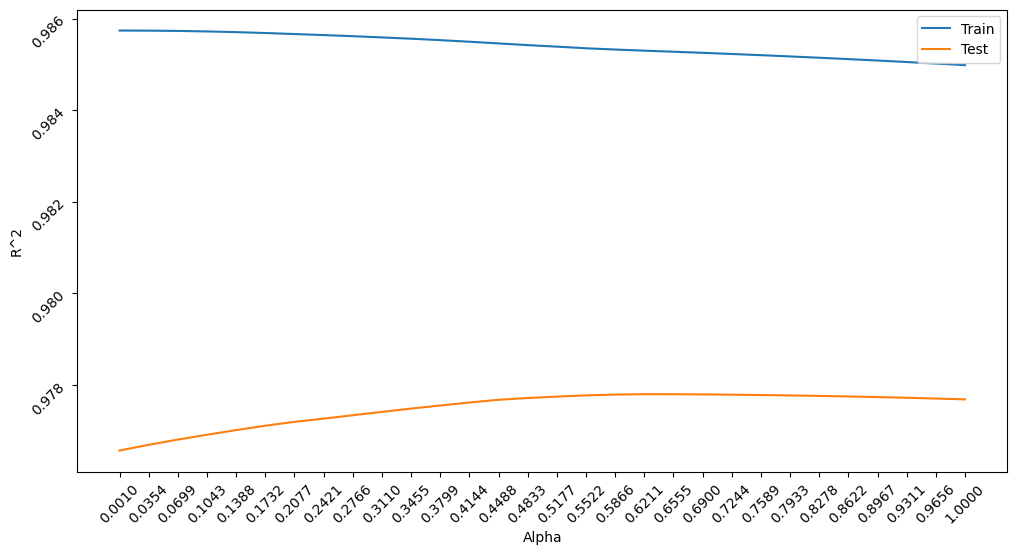

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_list, train_scores, label='Train')
plt.plot(alpha_list, test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.xticks(alpha_list)
plt.tick_params(rotation=45)
plt.legend()
plt.show()

### L2 нормализация

In [ ]:
alpha_list = np.linspace(1, 3000, 30)

# Создаём пустые списки, в которые будем добавлять результаты
train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    # Обучаем модель
    ridge_lr_poly.fit(X_train_scaled_poly, y_train4)
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
    # Делаем предсказание для тестовой выборки
    y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train4, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test4, y_test_predict_poly))

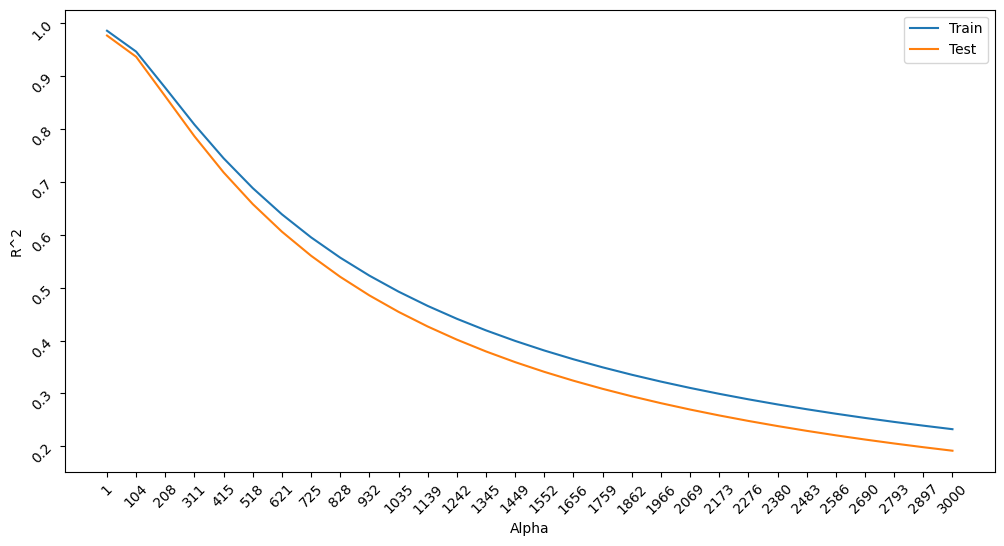

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_list, train_scores, label='Train')
plt.plot(alpha_list, test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.xticks(alpha_list)
plt.tick_params(rotation=45)
plt.legend()
plt.show()

В ходе анализа данных и построения моделей для предсказания трат клиента на услуги компании в год было обнаружено, что наибольшее влияние на траты клиентов оказывает продолжительность лет в качестве клиента данной компании. Также время, проведенное в приложении компании коррелирует с тратами клиентов. Среднее длительность консультации оффлайн также влияет на траты клиентов, но в меньшей степени, чем время использования приложения. Вместе с тем, время на вебсайте компании имеет наименьшее влияние на траты клментов. В связи с этим можно порекоммендовать направить средства для улучшения приложения компании и качества прдоставления услуги оффлайн консультаций.